### Toymodel Train Test Evaluation

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import BicycleSolver, BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


#### Set up dataloader, model, solver

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,
                                  shuffle=True)

In [3]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode='clr')
discriminator = ToyDiscriminator()

In [4]:
solver = BicycleSolver(generator, discriminator, 
                       loss_weights = {'traj': 10,
                                     'disc': 1,
                                 'z': 0.5,
                                 'kl': 0.1}
                       ,
                       optims_args={'generator': {'lr': 1e-3}, 'discriminator': {'lr': 1e-3}, 'encoder': {'lr': 1e-3}})

In [5]:
solver.optimizer_e

#### Training

In [6]:
solver.train(trainloader, epochs = 100, checkpoint_every=1, print_every = 5,steps = {'generator': 1, 'discriminator': 1})

Training new model

       Generator Losses                        Discriminator Losses
Epochs G_BCE     G_L1      G_L1z     G_KL      D_Real    D_Fake    
100    0.614     0.844                         0.656     0.890     
95     0.688     0.815     0.255     40.517    0.679     0.827     
90     0.661     0.821     0.249     38.408    0.684     0.818     
85     0.683     0.805     0.247     39.459    0.508     0.820     
80     0.694     0.811     0.232     40.370    0.572     0.823     
75     0.697     0.800     0.221     40.056    0.605     0.808     
70     0.695     0.849     0.208     39.857    0.634     0.811     
65     0.707     0.820     0.168     39.851    0.666     0.809     
60     0.674     0.807     0.170     39.205    0.545     0.809     
55     0.666     0.810     0.157     40.224    0.523     0.811     
50     0.707     0.821     0.155     40.176    0.497     0.790     
45     0.689     0.829     0.136     40.318    0.647     0.808     
40     0.668     0.787     0

In [15]:
output = solver.test(trainloader, seed=19)

#### Evaluation
visualization of predicted trajectories

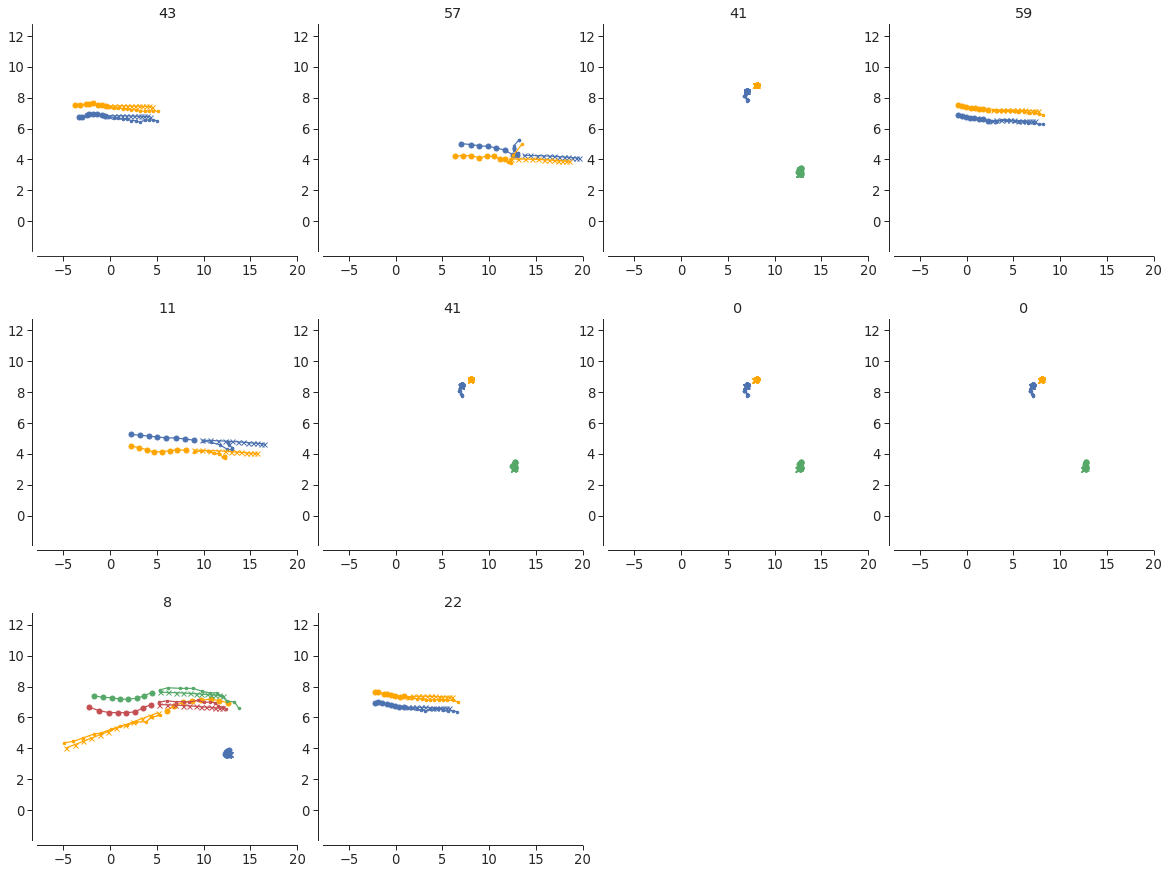

In [16]:
vis = Visualization()
ll = vis.trajectories(output, scenes=[10])